In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings 
warnings.filterwarnings('ignore')

In [12]:
from google.colab import files
uploaded= files.upload()

Saving Book1.csv to Book1 (1).csv


In [13]:
pandas.read_csv('Book1.csv')

,Date,Gross_Weight,Volume,Week_Number,Months,Year,Season
0,2021.01.04,538.5,4.098,1,1,2021,winter
1,2021.01.05,1521.3,8.522,1,1,2021,winter
2,2021.01.07,1011.8,4.063,1,1,2021,winter
3,2021.01.08,348.9,2.262,1,1,2021,winter
4,2021.01.11,71.8,0.317,2,1,2021,winter
...,...,...,...,...,...,...,...
490,2022.12.27,310.8,1.948,52,12,2022,winter
491,2022.12.28,539.1,2.800,52,12,2022,winter
492,2022.12.29,591.4,2.202,52,12,2022,winter
493,2022.12.30,398.5,1.868,52,12,2022,winter


In [14]:
df = pd. read_csv('Book1.csv')

In [15]:
df['Season_encoded'] = pd.factorize(df['Season'])[0]

In [22]:
df=df.drop(['Season_encoded'], axis=1)


In [25]:
print(df.shape)
df.head(3)

(495, 2)


,Date,Volume
0,2021.01.04,4.098
1,2021.01.05,8.522
2,2021.01.07,4.063


<Axes: >

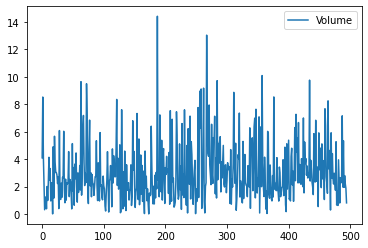

In [26]:
df.plot()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    495 non-null    object 
 1   Volume  495 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [28]:
df=df.dropna(how='any',axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    495 non-null    object 
 1   Volume  495 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [29]:
# Create a dataframe with only Volume
df=df.drop('Date', axis=1)
# Convert the dataframe to a numpy array
df=df.values
print(df[:5])

[[4.098]
 [8.522]
 [4.063]
 [2.262]
 [0.317]]


In [30]:
# Scale the data to make it applicable for RNN
scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df)
df_scaled[:5]

array([[0.28382792],
       [0.59128501],
       [0.28139551],
       [0.15623045],
       [0.02105775]])

In [31]:
# Split data into predictors and outcomes
# predict the volume of outbound Logistics within past 6 months' volumes of outbound logistics
X=[]
y=[]
sequence=6
for i in range(len(df_scaled) - sequence):
    X.append(df_scaled[i:(i + sequence),0]) 
    y.append(df_scaled[i + sequence,0])
X,y=np.array(X),np.array(y)

In [32]:
print("Predictors")
print(X[:5])
print("Outcomes")
print(y[:5])

Predictors
[[0.28382792 0.59128501 0.28139551 0.15623045 0.02105775 0.05101119]
 [0.59128501 0.28139551 0.15623045 0.02105775 0.05101119 0.08631594]
 [0.28139551 0.15623045 0.02105775 0.05101119 0.08631594 0.02578358]
 [0.15623045 0.02105775 0.05101119 0.08631594 0.02578358 0.13878657]
 [0.02105775 0.05101119 0.08631594 0.02578358 0.13878657 0.06796859]]
Outcomes
[0.08631594 0.02578358 0.13878657 0.06796859 0.15935784]


In [33]:
# Reshape predictor
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X.shape

(489, 6, 1)

In [34]:
# Split data into training and test
# 75% for training and 25 percent for testing
train_size = math.ceil(len(X) * 0.75)
test_size = len(X - train_size)

# Split X and y into training and test sets
X_train = X[:train_size, :]
y_train = y[:train_size]

X_test = X[train_size:len(X),:]
y_test = y[train_size:len(y)]

In [35]:
# Having a view of size for bot training and test sets
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train:  (367, 6, 1)
y_train:  (367,)
X_test :  (122, 6, 1)
y_test :  (122,)


## Building RNN Model


In [63]:
# build rnn model
rnn=Sequential()
rnn.add(SimpleRNN(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn.add(SimpleRNN(units=32, return_sequences=True))
rnn.add(SimpleRNN(units=32, return_sequences=True))
rnn.add(SimpleRNN(units=32))
rnn.add(Dense(units=1))
rnn.compile(optimizer='adam', loss='mean_squared_error')
rnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 6, 32)             1088      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 6, 32)             2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 6, 32)             2080      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,361
Trainable params: 7,361
Non-trainable params: 0
_________________________________________________________________


In [64]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU

In [65]:
# LSTM model
lstm=Sequential()
lstm.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm.add(LSTM(units=32, return_sequences=True))
lstm.add(LSTM(units=32, return_sequences=True))
lstm.add(LSTM(units=32))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error')
lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6, 32)             4352      
                                                                 
 lstm_5 (LSTM)               (None, 6, 32)             8320      
                                                                 
 lstm_6 (LSTM)               (None, 6, 32)             8320      
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [66]:
# GRU model
gru=Sequential()
gru.add(GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
gru.add(GRU(units=32, return_sequences=True))
gru.add(GRU(units=32, return_sequences=True))
gru.add(GRU(units=32))
gru.add(Dense(units=1))
gru.compile(optimizer='adam', loss='mean_squared_error')
gru.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 6, 32)             3360      
                                                                 
 gru_5 (GRU)                 (None, 6, 32)             6336      
                                                                 
 gru_6 (GRU)                 (None, 6, 32)             6336      
                                                                 
 gru_7 (GRU)                 (None, 32)                6336      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Introduce early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=40)

## Train RNN Model

In [68]:
rnn_history = rnn.fit(X_train, y_train, batch_size=16, epochs=1000, 
                      validation_split=0.2, callbacks=[early_stop], verbose=0)

In [69]:
# Fit LSTM model
lstm_history = lstm.fit(X_train, y_train, batch_size=16, epochs=1000,
                        validation_split=0.2, callbacks=[early_stop], verbose=0)

In [70]:
# Fit GRU model 
gru_history = gru.fit(X_train, y_train, batch_size=16, epochs=1000,
                      validation_split=0.2, callbacks=[early_stop], verbose=0)

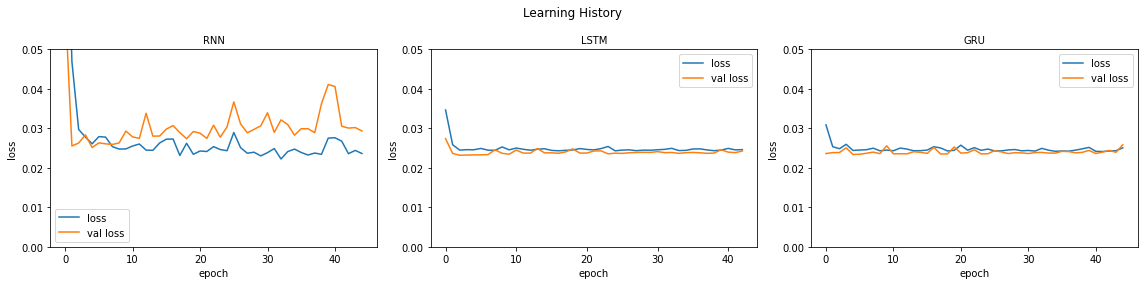

In [71]:
#Training History visualisation
 
titles = ['RNN', 'LSTM', 'GRU']

#  List of predicted models
models = [rnn_history, lstm_history, gru_history]

# Set the plot area
fig, ax = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)  

# Plot learning history
plt.suptitle('Learning History')
for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i], fontsize=10) 
    plt.plot(models[i].history['loss'], label='loss')
    plt.plot(models[i].history['val_loss'], label='val loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.ylim([0,0.05])

##Forecast

In [53]:
#  Forecasting with the 3 models 
# reverse the predicted value to real number

# Predict by RNN model
rnn_y_pred=rnn.predict(X_test)
rnn_y_pred=scaler.inverse_transform(rnn_y_pred)

# Predict by LSTM model
lstm_y_pred=lstm.predict(X_test)
lstm_y_pred=scaler.inverse_transform(lstm_y_pred)

# Predict by GRU model
gru_y_pred=gru.predict(X_test)
gru_y_pred=scaler.inverse_transform(gru_y_pred)

# Reverse test data to real number
y_test=y_test.reshape(y_test.shape[0],1)
y_test=scaler.inverse_transform(y_test)

4/4 [==============================] - 1s 6ms/step


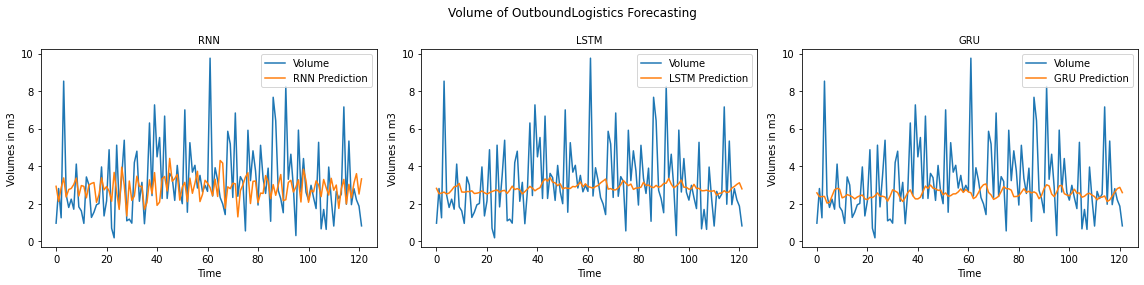

In [57]:
# Visualize Prediction Results

# subplot subtitles setting
titles = ['RNN', 'LSTM', 'GRU']

# Create a list of prediction models
models = [rnn_y_pred, lstm_y_pred, gru_y_pred]

# plot area seeting
fig, ax = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)  

# title setting
plt.suptitle('Volume of OutboundLogistics Forecasting')

# Create and show subplots
for i in range(0, 3):
    plt.subplot(1, 3,i+1)
    plt.title(titles[i], fontsize=10) 
    plt.plot(y_test, label='Volume')
    plt.plot(models[i], label=titles[i]+' Prediction')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Volumes in m3')